In [1]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical, plot_model
from keras.metrics import F1Score 
from keras import models, layers
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from PIL import ImageFont
import visualkeras

# Data and Model

In [2]:
# Load the data
(train_images, train_labels), (test_images, test_labels) =  fashion_mnist.load_data()

In [3]:
# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)) 
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1)) 
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels)

In [4]:
# Create the model
model = models.Sequential()

model.add(layers.Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32,kernel_size=3,activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(64,kernel_size=3,activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64,kernel_size=3,activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(10, activation='softmax'))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        25632     
                                                                 
 batch_normalization_2 (Bat  (None, 12, 12, 32)       

In [5]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[F1Score(average='weighted')])

In [6]:
# Train the model
model.fit(train_images, train_labels, epochs=35, batch_size=64)

Epoch 1/35

938/938 [==============================] - 80s 82ms/step - loss: 0.5746 - f1_score: 0.7943
Epoch 2/35
938/938 [==============================] - 67s 71ms/step - loss: 0.3546 - f1_score: 0.8718
Epoch 3/35
938/938 [==============================] - 67s 71ms/step - loss: 0.3058 - f1_score: 0.8903
Epoch 4/35
938/938 [==============================] - 68s 72ms/step - loss: 0.2806 - f1_score: 0.8981
Epoch 5/35
938/938 [==============================] - 69s 74ms/step - loss: 0.2570 - f1_score: 0.9075
Epoch 6/35
938/938 [==============================] - 72s 76ms/step - loss: 0.2443 - f1_score: 0.9115
Epoch 7/35
938/938 [==============================] - 72s 77ms/step - loss: 0.2297 - f1_score: 0.9162
Epoch 8/35
938/938 [==============================] - 67s 71ms/step - loss: 0.2178 - f1_score: 0.9216
Epoch 9/35
938/938 [==============================] - 70s 74ms/step - loss: 0.2072 - f1_score: 0.9246
Epoch 10/35
938/938 [==============================] - 65s 69ms/step - loss: 0.19

In [7]:
# Predict the test data
y_true = test_labels
y_pred = model.predict(test_images)

313/313 [==============================] - 10s 28ms/step


# Reporting

In [17]:
# Convert predicted values to integer labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels to integer labels
y_true_int = np.argmax(y_true, axis=1)

# Calculate the classification report
report = classification_report(y_true_int, y_pred_classes, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.8544    0.9330    0.8920      1000
           1     0.9970    0.9890    0.9930      1000
           2     0.8946    0.9250    0.9095      1000
           3     0.9367    0.9320    0.9343      1000
           4     0.8718    0.9320    0.9009      1000
           5     0.9879    0.9800    0.9839      1000
           6     0.8775    0.7020    0.7800      1000
           7     0.9661    0.9690    0.9675      1000
           8     0.9792    0.9910    0.9851      1000
           9     0.9634    0.9740    0.9687      1000

    accuracy                         0.9327     10000
   macro avg     0.9329    0.9327    0.9315     10000
weighted avg     0.9329    0.9327    0.9315     10000



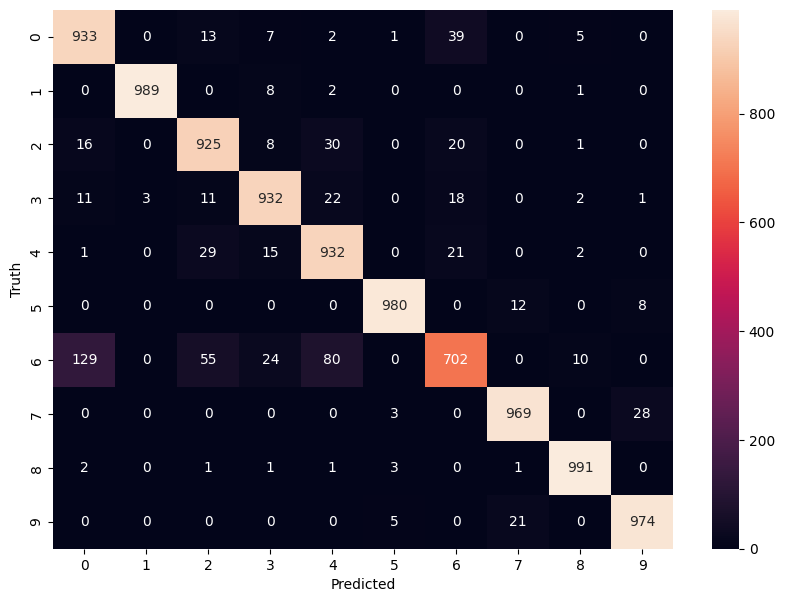

In [12]:
# Compute the confusion matrix
cm = confusion_matrix(y_true_int, y_pred_classes)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [20]:
# Generate classification report as dictionary
report_dict = classification_report(y_true_int, y_pred_classes, digits=4, output_dict=True)

# Convert the dictionary to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Save the DataFrame to an Excel file
filename = 'cnn_fmnist_opt'
report_df.to_excel(filename + '.xlsx', sheet_name=filename)

In [22]:
# Export model image with plot_model
plot_model(model, to_file=filename + '.png', show_shapes=True, show_layer_names=True)

c:\Users\micha\CODE\lokal\venv_cnn\Scripts;C:\Users\micha\CODE\lokal\venv_cnn\Scripts;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0\;C:\Windows\System32\OpenSSH\;C:\Program Files\Microsoft VS Code\bin;C:\Program Files\dotnet\;C:\Program Files\Git\cmd;C:\Users\micha\AppData\Local\Programs\Python\Python311\Scripts\;C:\Users\micha\AppData\Local\Programs\Python\Python311\;C:\Users\micha\AppData\Local\Microsoft\WindowsApps;C:\Program Files (x86)\Nmap
c:\Users\micha\CODE\lokal\venv_cnn\Scripts;C:\Users\micha\CODE\lokal\venv_cnn\Scripts;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0\;C:\Windows\System32\OpenSSH\;C:\Program Files\Microsoft VS Code\bin;C:\Program Files\dotnet\;C:\Program Files\Git\cmd;C:\Users\micha\AppData\Local\Programs\Python\Python311\Scripts\;C:\Users\micha\AppData\Local\Programs\Python\Python311\;C:\Users\micha\AppData\Local\Microsoft\WindowsApps;C:\Program Files (x86)

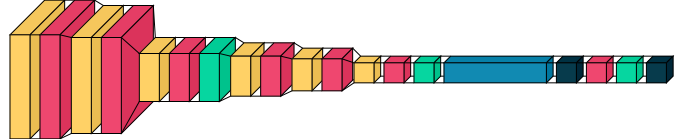

In [24]:
# Export model image with visualkeras
font = ImageFont.truetype("C:\\Windows\\Fonts\\Arial.ttf", 10)
visualkeras.layered_view(model, legend=True, font=font, to_file=filename + '.png')